# Modeling

Now that I've finished all the previous steps I will now use diffrent machine learning models to make predictions of my data with my problem statement in mind.

My problem statement was: 'In the next 8 months, this project will utilize a 2019 dataset to quantitatively analyze gender-based mental health disparities globally, focusing on eating disorders and bipolar disorder. By applying statistical methods, the project aims to provide measurable insights into prevalence rates, regional variations, and access to mental health care resources, with the ultimate goal of proposing actionable strategies for improvement.'

After trying many different models I decided that logistic regression, and Support Vector machines(SVM) would be best. A lot of the other models I tried were cooperating with my tables the way I needed them to.

For starters I will be uploading all the libraries and csv files needed to complete the notebook.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [50]:
df2_bip = pd.read_csv('cleaned_data(2).csv')
df4_eat = pd.read_csv('cleaned_data(4).csv')

I will also be using 2 different tables so I will be repeating the process twice. I just wont write about how to get there again since it will be the same just with a different table.

I'll first quickly train the data.

In [4]:
X = df2_bip.drop(['Percentage of Prevalence (Bipolar Disorders(M))',
              'Percentage of Prevalence (Bipolar Disorders(F))'], axis=1)
y = df2_bip[['Percentage of Prevalence (Bipolar Disorders(M))',
          'Percentage of Prevalence (Bipolar Disorders(F))']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(45115, 5)
(11279, 5)
45115
11279


In [17]:
df2_bip.head()

,index,Country,Code,Year,Percentage of Prevalence (Bipolar Disorders(M)),Percentage of Prevalence (Bipolar Disorders(F)),Population (historical estimates)
0,1,Afghanistan,AFG,1990,0.675452,0.762342,12412311.0
1,2,Afghanistan,AFG,1991,0.674992,0.762142,13299016.0
2,3,Afghanistan,AFG,1992,0.674579,0.761958,14485543.0
3,4,Afghanistan,AFG,1993,0.674206,0.761774,15816601.0
4,5,Afghanistan,AFG,1994,0.673876,0.761599,17075728.0


Now I'll start.

# Logistic Regression

Logistic regression can help predict the likelihood of individuals having eating disorders or bipolar disorder based on various factors, though we will be mostly be looking at genders.It allows you to quantify the relationship between predictor variables, and the probability of having a mental health disorder.

For this to work I figured since the country, code or year does nothing for my problem statement, I dropped all columns. When I tried with those columns, no matter what I tried, some sort of error would happen.

In [27]:
columns_to_drop = ['Country', 'Code', 'Year']
df2_bip = df2_bip.drop(columns=columns_to_drop)

# Handle missing values
df2_bip = df2_bip.fillna(df2_bip.mean())

# Define the features (X) and target variable (y)
X = df2_bip.drop(columns=['Percentage of Prevalence (Bipolar Disorders(M))'])
y = df2_bip['Percentage of Prevalence (Bipolar Disorders(M))']

# Define the threshold for binarizing the target variable
threshold = 0.5

# Binarize the target variable based on the threshold
y_bin = np.where(y < threshold, 'low prevalence', 'high prevalence')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = logistic_model.score(X_train_scaled, y_train)
test_score = logistic_model.score(X_test_scaled, y_test)

print(f"Training accuracy: {train_score}")
print(f"Testing accuracy: {test_score}")

Training accuracy: 0.9993350326942259
Testing accuracy: 0.9991133965777108


Once I got my results, I used the confusion matrix to visualize the findings.

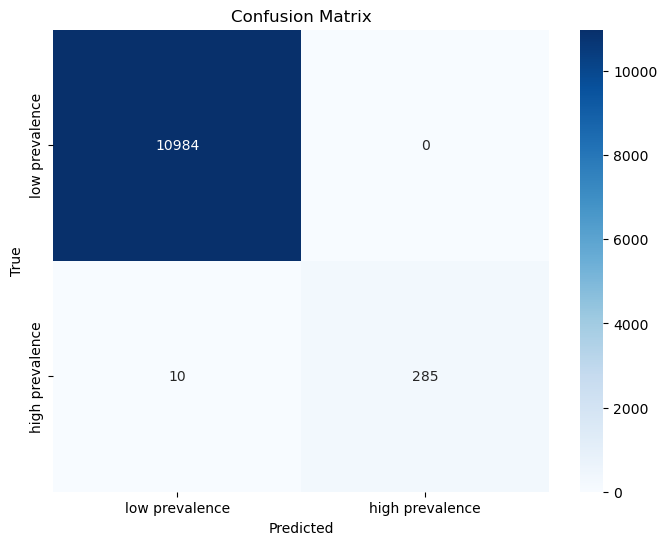

                 precision    recall  f1-score   support

high prevalence       1.00      1.00      1.00     10984
 low prevalence       1.00      0.97      0.98       295

       accuracy                           1.00     11279
      macro avg       1.00      0.98      0.99     11279
   weighted avg       1.00      1.00      1.00     11279



In [28]:
# Predict on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['low prevalence', 'high prevalence'], yticklabels=['low prevalence', 'high prevalence'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

Using these results we can infer that Bipolar disorder in males is lower usually on the lower spectrum compared to females. Seeing this and using the information previously gathered we know that on a, global spectrum it is higher found in women. However there are still a good amount in the high prevalence box.

# Support Vector Machines (SVM)

SVM can effectively classify individuals into different categories based on their likelihood of having a mental health disorder.
It can handle nonlinear relationships between predictors and the target variable, allowing for more accurate discrimination between gender groups and identifying disparities.


In [23]:
from sklearn.svm import SVC

# Dropping the 'index' column as it seems to be an identifier
df2_bip.drop(columns=['index'], inplace=True)

# Removing non-numeric columns
numeric_cols = df2_bip.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df2_bip[numeric_cols]

# Dropping rows with missing values
df_numeric.dropna(inplace=True)

# Defining thresholds for "low" and "high" prevalence
low_threshold = df_numeric['Percentage of Prevalence (Bipolar Disorders(M))'].quantile(0.25)
high_threshold = df_numeric['Percentage of Prevalence (Bipolar Disorders(M))'].quantile(0.75)

# Creating target classes based on thresholds
df_numeric['Prevalence Class'] = pd.cut(df_numeric['Percentage of Prevalence (Bipolar Disorders(M))'],
                                        bins=[-float('inf'), low_threshold, high_threshold, float('inf')],
                                        labels=['low', 'medium', 'high'])

# Separating features (X) and target (y)
X = df_numeric.drop(columns=['Percentage of Prevalence (Bipolar Disorders(M))', 
                              'Percentage of Prevalence (Bipolar Disorders(F))',
                              'Prevalence Class'])
y = df_numeric['Prevalence Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Making predictions on the testing data
y_pred = svm_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


C:\Users\munae\AppData\Local\Temp\ipykernel_198152\2163233163.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.dropna(inplace=True)
C:\Users\munae\AppData\Local\Temp\ipykernel_198152\2163233163.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['Prevalence Class'] = pd.cut(df_numeric['Percentage of Prevalence (Bipolar Disorders(M))'],


Accuracy: 0.5089430894308943


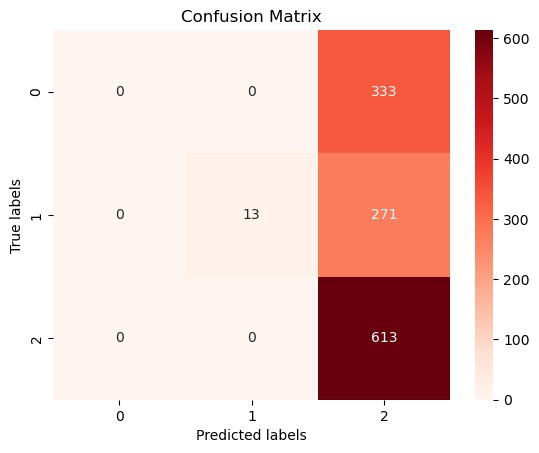

In [24]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)


This just seconds my first model. Men are less likely to have bipolar disorder.

##### Second table

In [39]:
X = df4_eat.drop(['Percentage of Prevalence (Eating disorders(M))',
       'Percentage of Prevalence (Eating disorders(F))'], axis=1)
y = df4_eat[['Percentage of Prevalence (Eating disorders(M))',
       'Percentage of Prevalence (Eating disorders(F))']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(45115, 1)
(11279, 1)
45115
11279


# Logistic Regression

In [41]:
df4_eat.head()

,Percentage of Prevalence (Eating disorders(M)),Percentage of Prevalence (Eating disorders(F)),Population (historical estimates)
0,0.091421,0.164942,12412311.0
1,0.088841,0.159850,13299016.0
2,0.086286,0.155230,14485543.0
3,0.084179,0.150636,15816601.0
4,0.081881,0.146573,17075728.0


In [43]:
# Handle missing values
df4_eat = df4_eat.fillna(df4_eat.mean())

# Define the features (X) and target variable (y)
X = df4_eat.drop(columns=['Percentage of Prevalence (Eating disorders(M))'])
y = df4_eat['Percentage of Prevalence (Eating disorders(M))']

# Define the threshold for binarizing the target variable
threshold = 0.5

# Binarize the target variable based on the threshold
y_bin = np.where(y < threshold, 'low prevalence', 'high prevalence')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = logistic_model.score(X_train_scaled, y_train)
test_score = logistic_model.score(X_test_scaled, y_test)

print(f"Training accuracy: {train_score}")
print(f"Testing accuracy: {test_score}")

Training accuracy: 0.9996231851933947
Testing accuracy: 0.9995566982888554


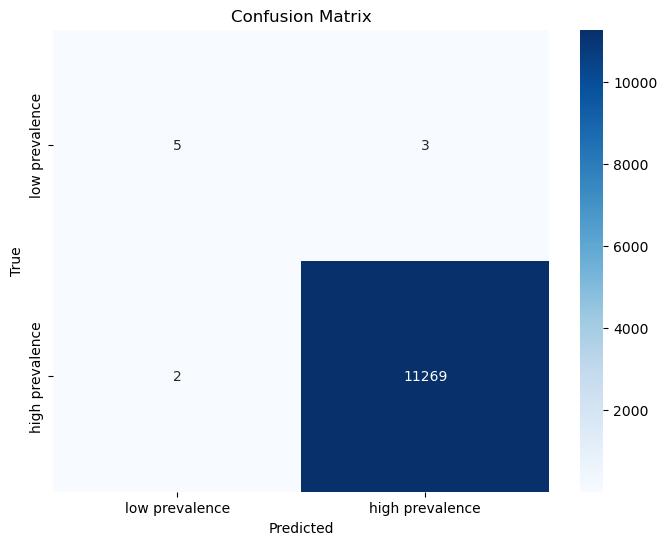

                 precision    recall  f1-score   support

high prevalence       0.71      0.62      0.67         8
 low prevalence       1.00      1.00      1.00     11271

       accuracy                           1.00     11279
      macro avg       0.86      0.81      0.83     11279
   weighted avg       1.00      1.00      1.00     11279



In [44]:
# Predict on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['low prevalence', 'high prevalence'], yticklabels=['low prevalence', 'high prevalence'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# Support Vector Machines (SVM)

In [53]:
# Dropping the 'index' column as it seems to be an identifier
df4_eat.drop(columns=['index'], inplace=True)

# Removing non-numeric columns
numeric_cols = df4_eat.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df4_eat[numeric_cols]

# Dropping rows with missing values
df_numeric.dropna(inplace=True)

# Defining thresholds for "low" and "high" prevalence
low_threshold = df_numeric['Percentage of Prevalence (Eating disorders(M))'].quantile(0.25)
high_threshold = df_numeric['Percentage of Prevalence (Eating disorders(M))'].quantile(0.75)

# Creating target classes based on thresholds
df_numeric['Prevalence Class'] = pd.cut(df_numeric['Percentage of Prevalence (Eating disorders(M))'],
                                        bins=[-float('inf'), low_threshold, high_threshold, float('inf')],
                                        labels=['low', 'medium', 'high'])

# Separating features (X) and target (y)
X = df_numeric.drop(columns=['Percentage of Prevalence (Eating disorders(M))',
                              'Percentage of Prevalence (Eating disorders(F))',
                              'Prevalence Class'])
y = df_numeric['Prevalence Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Making predictions on the testing data
y_pred = svm_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


C:\Users\munae\AppData\Local\Temp\ipykernel_198152\184198576.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.dropna(inplace=True)
C:\Users\munae\AppData\Local\Temp\ipykernel_198152\184198576.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['Prevalence Class'] = pd.cut(df_numeric['Percentage of Prevalence (Eating disorders(M))'],


Accuracy: 0.4772357723577236


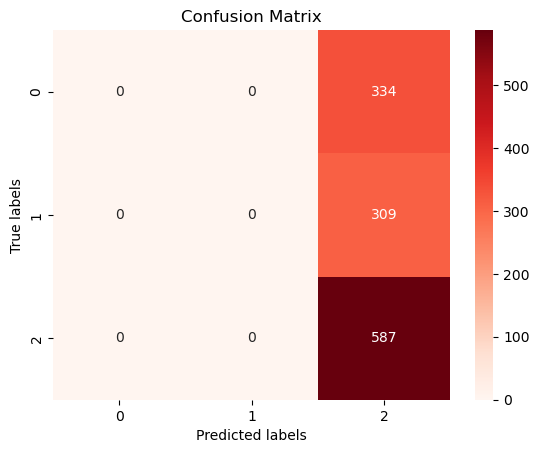

In [54]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

From the results I've gained to both I can see that eating disorders are, globally, also more prominent in women.